## 1. 기본의 프로그램 방식

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#섭씨온도(input data)를 받아 화씨온도로 출력
def celsisu_to_faherenheit(c):
    return c*1.8+32

In [3]:
input_c=int(input("섭씨온도는? : "))
print('화씨온도는 :',celsisu_to_faherenheit(input_c))

섭씨온도는? : 


ValueError: invalid literal for int() with base 10: ''

## 2. 머신러닝 프로그램 방식
- 1. 데이터 확보 및 생성
- 2. 데이터 전처리 : 훈련데이터셋(학습데이터셋), 검증데이터셋, 시험데이터셋, ...
- 3. 모델 구성
- 4. 모델 학습과정 설정
- 5. 모델 학습
- 6. 모델 평가(시험데이터셋으로)
- 7. 모델 사용(입력값을 주어지면 예측값을 받기)

### [keras](https://keras.io/ko/activations/)

### 노이즈 없는 데이터로 실습

In [4]:
# 1. 데이터 생성
data_C=np.array(range(100)) #np.arange(100) 독립변수
data_F=celsisu_to_faherenheit(data_C) # 타겟변수

In [5]:
# 3. 모델 구성
from tensorflow.keras.models import Sequential #모델 생성
from tensorflow.keras.layers import Dense      #입력값과 출력값
model=Sequential()
model.add(Dense(1,input_dim=1)) #독립변수가 1개

In [6]:
# 4. 모델 학습 과정 설정
model.compile(loss='mse', optimizer='rmsprop', metrics=['mae']) #mean square error, root mean square
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
None


In [7]:
# 학습전 예측
model.predict(np.array([[0]]))

array([[0.]], dtype=float32)

In [8]:
model.save('model/before_learning.h5')

In [8]:
# 2. 데이터 전처리 : 컴퓨터에게 학습시키기 위해 normalize함(전체의 편차를 비슷하게) 이상적인 편차는 0~1
scaled_data_C=data_C/100.0
scaled_data_F=data_F/100.0
print('독립변수는 ', scaled_data_C)
print('타겟변수는 ', scaled_data_F)

독립변수는  [0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]
타겟변수는  [0.32  0.338 0.356 0.374 0.392 0.41  0.428 0.446 0.464 0.482 0.5   0.518
 0.536 0.554 0.572 0.59  0.608 0.626 0.644 0.662 0.68  0.698 0.716 0.734
 0.752 0.77  0.788 0.806 0.824 0.842 0.86  0.878 0.896 0.914 0.932 0.95
 0.968 0.986 1.004 1.022 1.04  1.058 1.076 1.094 1.112 1.13  1.148 1.166
 1.184 1.202 1.22  1.238 1.256 1.274 1.292 1.31  1.328 1.346 1.364 1.382
 1.4   1.418 1.436 1.454 1.472 1.49  1.508 1.526 1.544 1.562 1.58  1.598
 1.616 1.634 1.652 1.67  1.688 1.706 1.7

In [9]:
# 모델 학습시키기
hist = model.fit(scaled_data_C, scaled_data_F, epochs=1000, verbose=2) #독립변수(훈련데이터), 타겟변수(훈련데이터), 학습횟수, 학습시 출력여부

Epoch 1/1000
4/4 - 0s - loss: 1.4058 - mae: 1.0954
Epoch 2/1000
4/4 - 0s - loss: 1.3786 - mae: 1.0838
Epoch 3/1000
4/4 - 0s - loss: 1.3608 - mae: 1.0762
Epoch 4/1000
4/4 - 0s - loss: 1.3441 - mae: 1.0690
Epoch 5/1000
4/4 - 0s - loss: 1.3282 - mae: 1.0620
Epoch 6/1000
4/4 - 0s - loss: 1.3143 - mae: 1.0560
Epoch 7/1000
4/4 - 0s - loss: 1.3010 - mae: 1.0501
Epoch 8/1000
4/4 - 0s - loss: 1.2889 - mae: 1.0447
Epoch 9/1000
4/4 - 0s - loss: 1.2768 - mae: 1.0393
Epoch 10/1000
4/4 - 0s - loss: 1.2641 - mae: 1.0337
Epoch 11/1000
4/4 - 0s - loss: 1.2507 - mae: 1.0277
Epoch 12/1000
4/4 - 0s - loss: 1.2359 - mae: 1.0211
Epoch 13/1000
4/4 - 0s - loss: 1.2231 - mae: 1.0152
Epoch 14/1000
4/4 - 0s - loss: 1.2111 - mae: 1.0097
Epoch 15/1000
4/4 - 0s - loss: 1.1977 - mae: 1.0036
Epoch 16/1000
4/4 - 0s - loss: 1.1853 - mae: 0.9979
Epoch 17/1000
4/4 - 0s - loss: 1.1717 - mae: 0.9916
Epoch 18/1000
4/4 - 0s - loss: 1.1590 - mae: 0.9857
Epoch 19/1000
4/4 - 0s - loss: 1.1465 - mae: 0.9798
Epoch 20/1000
4/4 - 0

Epoch 158/1000
4/4 - 0s - loss: 0.1139 - mae: 0.2790
Epoch 159/1000
4/4 - 0s - loss: 0.1112 - mae: 0.2761
Epoch 160/1000
4/4 - 0s - loss: 0.1080 - mae: 0.2726
Epoch 161/1000
4/4 - 0s - loss: 0.1062 - mae: 0.2705
Epoch 162/1000
4/4 - 0s - loss: 0.1042 - mae: 0.2682
Epoch 163/1000
4/4 - 0s - loss: 0.1019 - mae: 0.2656
Epoch 164/1000
4/4 - 0s - loss: 0.0999 - mae: 0.2634
Epoch 165/1000
4/4 - 0s - loss: 0.0974 - mae: 0.2604
Epoch 166/1000
4/4 - 0s - loss: 0.0951 - mae: 0.2578
Epoch 167/1000
4/4 - 0s - loss: 0.0932 - mae: 0.2556
Epoch 168/1000
4/4 - 0s - loss: 0.0910 - mae: 0.2530
Epoch 169/1000
4/4 - 0s - loss: 0.0889 - mae: 0.2504
Epoch 170/1000
4/4 - 0s - loss: 0.0874 - mae: 0.2486
Epoch 171/1000
4/4 - 0s - loss: 0.0856 - mae: 0.2466
Epoch 172/1000
4/4 - 0s - loss: 0.0841 - mae: 0.2447
Epoch 173/1000
4/4 - 0s - loss: 0.0820 - mae: 0.2421
Epoch 174/1000
4/4 - 0s - loss: 0.0802 - mae: 0.2398
Epoch 175/1000
4/4 - 0s - loss: 0.0793 - mae: 0.2387
Epoch 176/1000
4/4 - 0s - loss: 0.0781 - mae: 

Epoch 313/1000
4/4 - 0s - loss: 0.0169 - mae: 0.1120
Epoch 314/1000
4/4 - 0s - loss: 0.0167 - mae: 0.1114
Epoch 315/1000
4/4 - 0s - loss: 0.0164 - mae: 0.1107
Epoch 316/1000
4/4 - 0s - loss: 0.0162 - mae: 0.1099
Epoch 317/1000
4/4 - 0s - loss: 0.0160 - mae: 0.1091
Epoch 318/1000
4/4 - 0s - loss: 0.0157 - mae: 0.1083
Epoch 319/1000
4/4 - 0s - loss: 0.0155 - mae: 0.1075
Epoch 320/1000
4/4 - 0s - loss: 0.0153 - mae: 0.1066
Epoch 321/1000
4/4 - 0s - loss: 0.0150 - mae: 0.1058
Epoch 322/1000
4/4 - 0s - loss: 0.0148 - mae: 0.1049
Epoch 323/1000
4/4 - 0s - loss: 0.0146 - mae: 0.1042
Epoch 324/1000
4/4 - 0s - loss: 0.0144 - mae: 0.1034
Epoch 325/1000
4/4 - 0s - loss: 0.0141 - mae: 0.1026
Epoch 326/1000
4/4 - 0s - loss: 0.0139 - mae: 0.1017
Epoch 327/1000
4/4 - 0s - loss: 0.0137 - mae: 0.1009
Epoch 328/1000
4/4 - 0s - loss: 0.0134 - mae: 0.1000
Epoch 329/1000
4/4 - 0s - loss: 0.0132 - mae: 0.0991
Epoch 330/1000
4/4 - 0s - loss: 0.0130 - mae: 0.0982
Epoch 331/1000
4/4 - 0s - loss: 0.0128 - mae: 

Epoch 464/1000
4/4 - 0s - loss: 6.1704e-07 - mae: 7.5755e-04
Epoch 465/1000
4/4 - 0s - loss: 2.2291e-07 - mae: 4.6120e-04
Epoch 466/1000
4/4 - 0s - loss: 6.0481e-07 - mae: 7.5650e-04
Epoch 467/1000
4/4 - 0s - loss: 1.0041e-06 - mae: 9.6867e-04
Epoch 468/1000
4/4 - 0s - loss: 3.9090e-07 - mae: 6.1045e-04
Epoch 469/1000
4/4 - 0s - loss: 5.5105e-08 - mae: 2.2428e-04
Epoch 470/1000
4/4 - 0s - loss: 9.7195e-07 - mae: 9.4349e-04
Epoch 471/1000
4/4 - 0s - loss: 7.5856e-07 - mae: 8.4987e-04
Epoch 472/1000
4/4 - 0s - loss: 3.6199e-07 - mae: 5.8676e-04
Epoch 473/1000
4/4 - 0s - loss: 9.0072e-07 - mae: 9.2096e-04
Epoch 474/1000
4/4 - 0s - loss: 1.9863e-07 - mae: 4.3419e-04
Epoch 475/1000
4/4 - 0s - loss: 1.0263e-06 - mae: 9.8942e-04
Epoch 476/1000
4/4 - 0s - loss: 2.8969e-07 - mae: 5.2732e-04
Epoch 477/1000
4/4 - 0s - loss: 7.2124e-07 - mae: 8.3257e-04
Epoch 478/1000
4/4 - 0s - loss: 2.3868e-07 - mae: 4.7650e-04
Epoch 479/1000
4/4 - 0s - loss: 6.1324e-07 - mae: 7.6093e-04
Epoch 480/1000
4/4 - 0s 

Epoch 600/1000
4/4 - 0s - loss: 2.9541e-07 - mae: 5.3189e-04
Epoch 601/1000
4/4 - 0s - loss: 9.4909e-07 - mae: 9.5573e-04
Epoch 602/1000
4/4 - 0s - loss: 6.7369e-07 - mae: 7.8329e-04
Epoch 603/1000
4/4 - 0s - loss: 3.0479e-07 - mae: 5.3769e-04
Epoch 604/1000
4/4 - 0s - loss: 3.7340e-07 - mae: 5.9585e-04
Epoch 605/1000
4/4 - 0s - loss: 1.1180e-06 - mae: 0.0010
Epoch 606/1000
4/4 - 0s - loss: 4.2453e-07 - mae: 6.3215e-04
Epoch 607/1000
4/4 - 0s - loss: 2.0358e-07 - mae: 4.4034e-04
Epoch 608/1000
4/4 - 0s - loss: 5.7780e-07 - mae: 7.2956e-04
Epoch 609/1000
4/4 - 0s - loss: 1.4173e-06 - mae: 0.0011
Epoch 610/1000
4/4 - 0s - loss: 5.8923e-08 - mae: 2.2474e-04
Epoch 611/1000
4/4 - 0s - loss: 7.5523e-08 - mae: 2.5956e-04
Epoch 612/1000
4/4 - 0s - loss: 1.1807e-06 - mae: 0.0010
Epoch 613/1000
4/4 - 0s - loss: 7.1499e-07 - mae: 7.8107e-04
Epoch 614/1000
4/4 - 0s - loss: 1.2962e-07 - mae: 3.4279e-04
Epoch 615/1000
4/4 - 0s - loss: 3.5709e-07 - mae: 5.6775e-04
Epoch 616/1000
4/4 - 0s - loss: 1.38

Epoch 736/1000
4/4 - 0s - loss: 5.1529e-07 - mae: 7.0214e-04
Epoch 737/1000
4/4 - 0s - loss: 5.3848e-07 - mae: 7.1354e-04
Epoch 738/1000
4/4 - 0s - loss: 9.6319e-07 - mae: 9.4958e-04
Epoch 739/1000
4/4 - 0s - loss: 1.9098e-07 - mae: 4.1362e-04
Epoch 740/1000
4/4 - 0s - loss: 4.0737e-07 - mae: 6.1068e-04
Epoch 741/1000
4/4 - 0s - loss: 1.0344e-06 - mae: 9.9235e-04
Epoch 742/1000
4/4 - 0s - loss: 4.2580e-07 - mae: 6.3499e-04
Epoch 743/1000
4/4 - 0s - loss: 2.1567e-07 - mae: 4.5296e-04
Epoch 744/1000
4/4 - 0s - loss: 8.0983e-07 - mae: 8.7506e-04
Epoch 745/1000
4/4 - 0s - loss: 6.7380e-07 - mae: 7.9987e-04
Epoch 746/1000
4/4 - 0s - loss: 6.9026e-07 - mae: 8.1261e-04
Epoch 747/1000
4/4 - 0s - loss: 1.6164e-07 - mae: 3.9426e-04
Epoch 748/1000
4/4 - 0s - loss: 4.9168e-07 - mae: 6.6853e-04
Epoch 749/1000
4/4 - 0s - loss: 8.5437e-07 - mae: 9.0655e-04
Epoch 750/1000
4/4 - 0s - loss: 6.1434e-07 - mae: 7.6683e-04
Epoch 751/1000
4/4 - 0s - loss: 5.1201e-07 - mae: 7.0144e-04
Epoch 752/1000
4/4 - 0s 

Epoch 872/1000
4/4 - 0s - loss: 3.5955e-07 - mae: 5.8010e-04
Epoch 873/1000
4/4 - 0s - loss: 8.4806e-07 - mae: 8.9976e-04
Epoch 874/1000
4/4 - 0s - loss: 4.4517e-07 - mae: 6.5543e-04
Epoch 875/1000
4/4 - 0s - loss: 4.7358e-07 - mae: 6.7696e-04
Epoch 876/1000
4/4 - 0s - loss: 6.2561e-07 - mae: 7.7446e-04
Epoch 877/1000
4/4 - 0s - loss: 5.2037e-07 - mae: 7.0633e-04
Epoch 878/1000
4/4 - 0s - loss: 8.6082e-07 - mae: 9.0976e-04
Epoch 879/1000
4/4 - 0s - loss: 2.1351e-07 - mae: 4.5389e-04
Epoch 880/1000
4/4 - 0s - loss: 3.2652e-07 - mae: 5.5599e-04
Epoch 881/1000
4/4 - 0s - loss: 8.0045e-07 - mae: 8.5566e-04
Epoch 882/1000
4/4 - 0s - loss: 9.9591e-07 - mae: 9.1498e-04
Epoch 883/1000
4/4 - 0s - loss: 2.0618e-08 - mae: 1.4116e-04
Epoch 884/1000
4/4 - 0s - loss: 1.0101e-07 - mae: 3.0179e-04
Epoch 885/1000
4/4 - 0s - loss: 1.1567e-06 - mae: 0.0011
Epoch 886/1000
4/4 - 0s - loss: 9.5508e-07 - mae: 8.9760e-04
Epoch 887/1000
4/4 - 0s - loss: 6.5566e-08 - mae: 2.5078e-04
Epoch 888/1000
4/4 - 0s - lo

In [11]:
hist.history.keys()

dict_keys(['loss', 'mae'])

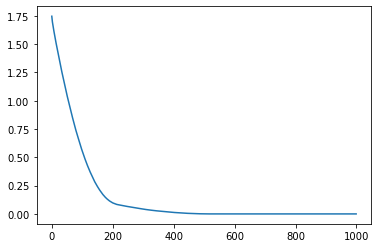

In [12]:
plt.plot(hist.history['loss'])
plt.show()

In [13]:
model.predict(np.array([0]))

array([[0.32042587]], dtype=float32)

In [14]:
model.predict(np.array([0.01]))

array([[0.338432]], dtype=float32)

In [15]:
model.save('model/after_learning.h5')

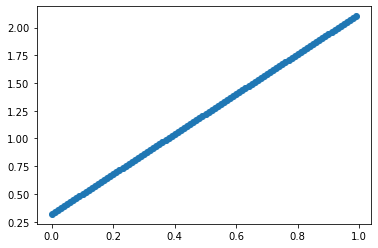

In [16]:
plt.scatter(x=scaled_data_C, y=scaled_data_F)

### 노이즈 있는 데이터로 실습

In [17]:
# 평균이 0이고 표준편차가 0.1인 데이터 100개
noise=np.array(np.random.normal(0,0.1,100))
noised_scaled_data_F=noise+scaled_data_F

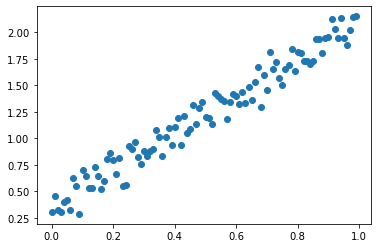

In [18]:
plt.scatter(x=scaled_data_C, y=noised_scaled_data_F)
plt.show()

In [19]:
# 3. 모델 구성
model2 = Sequential()
model2.add(Dense(1, input_dim=1))
# 4. 학습과정 설정
model2.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
print(model2.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
None


In [20]:
# 5. 학습시키기
hist2 = model2.fit(scaled_data_C,noised_scaled_data_F, epochs=1000, verbose=2)

Epoch 1/1000
4/4 - 0s - loss: 4.9871 - mae: 2.0104
Epoch 2/1000
4/4 - 0s - loss: 4.9353 - mae: 1.9984
Epoch 3/1000
4/4 - 0s - loss: 4.9022 - mae: 1.9910
Epoch 4/1000
4/4 - 0s - loss: 4.8726 - mae: 1.9841
Epoch 5/1000
4/4 - 0s - loss: 4.8445 - mae: 1.9776
Epoch 6/1000
4/4 - 0s - loss: 4.8182 - mae: 1.9715
Epoch 7/1000
4/4 - 0s - loss: 4.7928 - mae: 1.9655
Epoch 8/1000
4/4 - 0s - loss: 4.7678 - mae: 1.9597
Epoch 9/1000
4/4 - 0s - loss: 4.7425 - mae: 1.9537
Epoch 10/1000
4/4 - 0s - loss: 4.7168 - mae: 1.9478
Epoch 11/1000
4/4 - 0s - loss: 4.6919 - mae: 1.9420
Epoch 12/1000
4/4 - 0s - loss: 4.6647 - mae: 1.9355
Epoch 13/1000
4/4 - 0s - loss: 4.6393 - mae: 1.9296
Epoch 14/1000
4/4 - 0s - loss: 4.6150 - mae: 1.9237
Epoch 15/1000
4/4 - 0s - loss: 4.5889 - mae: 1.9176
Epoch 16/1000
4/4 - 0s - loss: 4.5624 - mae: 1.9112
Epoch 17/1000
4/4 - 0s - loss: 4.5385 - mae: 1.9055
Epoch 18/1000
4/4 - 0s - loss: 4.5146 - mae: 1.8997
Epoch 19/1000
4/4 - 0s - loss: 4.4899 - mae: 1.8938
Epoch 20/1000
4/4 - 0

Epoch 158/1000
4/4 - 0s - loss: 1.8235 - mae: 1.1265
Epoch 159/1000
4/4 - 0s - loss: 1.8094 - mae: 1.1213
Epoch 160/1000
4/4 - 0s - loss: 1.7939 - mae: 1.1158
Epoch 161/1000
4/4 - 0s - loss: 1.7781 - mae: 1.1100
Epoch 162/1000
4/4 - 0s - loss: 1.7640 - mae: 1.1051
Epoch 163/1000
4/4 - 0s - loss: 1.7521 - mae: 1.1006
Epoch 164/1000
4/4 - 0s - loss: 1.7386 - mae: 1.0959
Epoch 165/1000
4/4 - 0s - loss: 1.7223 - mae: 1.0899
Epoch 166/1000
4/4 - 0s - loss: 1.7101 - mae: 1.0856
Epoch 167/1000
4/4 - 0s - loss: 1.6969 - mae: 1.0808
Epoch 168/1000
4/4 - 0s - loss: 1.6837 - mae: 1.0761
Epoch 169/1000
4/4 - 0s - loss: 1.6710 - mae: 1.0717
Epoch 170/1000
4/4 - 0s - loss: 1.6559 - mae: 1.0661
Epoch 171/1000
4/4 - 0s - loss: 1.6433 - mae: 1.0616
Epoch 172/1000
4/4 - 0s - loss: 1.6293 - mae: 1.0566
Epoch 173/1000
4/4 - 0s - loss: 1.6167 - mae: 1.0522
Epoch 174/1000
4/4 - 0s - loss: 1.6014 - mae: 1.0466
Epoch 175/1000
4/4 - 0s - loss: 1.5882 - mae: 1.0418
Epoch 176/1000
4/4 - 0s - loss: 1.5751 - mae: 

Epoch 313/1000
4/4 - 0s - loss: 0.4497 - mae: 0.5667
Epoch 314/1000
4/4 - 0s - loss: 0.4470 - mae: 0.5651
Epoch 315/1000
4/4 - 0s - loss: 0.4428 - mae: 0.5627
Epoch 316/1000
4/4 - 0s - loss: 0.4387 - mae: 0.5605
Epoch 317/1000
4/4 - 0s - loss: 0.4352 - mae: 0.5584
Epoch 318/1000
4/4 - 0s - loss: 0.4321 - mae: 0.5566
Epoch 319/1000
4/4 - 0s - loss: 0.4284 - mae: 0.5545
Epoch 320/1000
4/4 - 0s - loss: 0.4247 - mae: 0.5523
Epoch 321/1000
4/4 - 0s - loss: 0.4224 - mae: 0.5511
Epoch 322/1000
4/4 - 0s - loss: 0.4202 - mae: 0.5498
Epoch 323/1000
4/4 - 0s - loss: 0.4171 - mae: 0.5480
Epoch 324/1000
4/4 - 0s - loss: 0.4134 - mae: 0.5459
Epoch 325/1000
4/4 - 0s - loss: 0.4106 - mae: 0.5443
Epoch 326/1000
4/4 - 0s - loss: 0.4070 - mae: 0.5421
Epoch 327/1000
4/4 - 0s - loss: 0.4045 - mae: 0.5406
Epoch 328/1000
4/4 - 0s - loss: 0.4016 - mae: 0.5388
Epoch 329/1000
4/4 - 0s - loss: 0.3995 - mae: 0.5376
Epoch 330/1000
4/4 - 0s - loss: 0.3978 - mae: 0.5366
Epoch 331/1000
4/4 - 0s - loss: 0.3955 - mae: 

Epoch 468/1000
4/4 - 0s - loss: 0.2302 - mae: 0.4072
Epoch 469/1000
4/4 - 0s - loss: 0.2295 - mae: 0.4066
Epoch 470/1000
4/4 - 0s - loss: 0.2287 - mae: 0.4059
Epoch 471/1000
4/4 - 0s - loss: 0.2277 - mae: 0.4052
Epoch 472/1000
4/4 - 0s - loss: 0.2265 - mae: 0.4040
Epoch 473/1000
4/4 - 0s - loss: 0.2257 - mae: 0.4032
Epoch 474/1000
4/4 - 0s - loss: 0.2249 - mae: 0.4026
Epoch 475/1000
4/4 - 0s - loss: 0.2239 - mae: 0.4015
Epoch 476/1000
4/4 - 0s - loss: 0.2233 - mae: 0.4009
Epoch 477/1000
4/4 - 0s - loss: 0.2224 - mae: 0.4000
Epoch 478/1000
4/4 - 0s - loss: 0.2216 - mae: 0.3994
Epoch 479/1000
4/4 - 0s - loss: 0.2208 - mae: 0.3989
Epoch 480/1000
4/4 - 0s - loss: 0.2200 - mae: 0.3981
Epoch 481/1000
4/4 - 0s - loss: 0.2190 - mae: 0.3972
Epoch 482/1000
4/4 - 0s - loss: 0.2182 - mae: 0.3965
Epoch 483/1000
4/4 - 0s - loss: 0.2173 - mae: 0.3955
Epoch 484/1000
4/4 - 0s - loss: 0.2164 - mae: 0.3947
Epoch 485/1000
4/4 - 0s - loss: 0.2158 - mae: 0.3941
Epoch 486/1000
4/4 - 0s - loss: 0.2148 - mae: 

Epoch 623/1000
4/4 - 0s - loss: 0.1174 - mae: 0.2876
Epoch 624/1000
4/4 - 0s - loss: 0.1166 - mae: 0.2867
Epoch 625/1000
4/4 - 0s - loss: 0.1160 - mae: 0.2858
Epoch 626/1000
4/4 - 0s - loss: 0.1152 - mae: 0.2851
Epoch 627/1000
4/4 - 0s - loss: 0.1146 - mae: 0.2844
Epoch 628/1000
4/4 - 0s - loss: 0.1140 - mae: 0.2835
Epoch 629/1000
4/4 - 0s - loss: 0.1135 - mae: 0.2829
Epoch 630/1000
4/4 - 0s - loss: 0.1130 - mae: 0.2821
Epoch 631/1000
4/4 - 0s - loss: 0.1125 - mae: 0.2814
Epoch 632/1000
4/4 - 0s - loss: 0.1119 - mae: 0.2807
Epoch 633/1000
4/4 - 0s - loss: 0.1113 - mae: 0.2800
Epoch 634/1000
4/4 - 0s - loss: 0.1105 - mae: 0.2790
Epoch 635/1000
4/4 - 0s - loss: 0.1099 - mae: 0.2782
Epoch 636/1000
4/4 - 0s - loss: 0.1093 - mae: 0.2773
Epoch 637/1000
4/4 - 0s - loss: 0.1086 - mae: 0.2765
Epoch 638/1000
4/4 - 0s - loss: 0.1080 - mae: 0.2758
Epoch 639/1000
4/4 - 0s - loss: 0.1074 - mae: 0.2749
Epoch 640/1000
4/4 - 0s - loss: 0.1067 - mae: 0.2740
Epoch 641/1000
4/4 - 0s - loss: 0.1061 - mae: 

Epoch 778/1000
4/4 - 0s - loss: 0.0443 - mae: 0.1731
Epoch 779/1000
4/4 - 0s - loss: 0.0440 - mae: 0.1725
Epoch 780/1000
4/4 - 0s - loss: 0.0436 - mae: 0.1718
Epoch 781/1000
4/4 - 0s - loss: 0.0433 - mae: 0.1711
Epoch 782/1000
4/4 - 0s - loss: 0.0429 - mae: 0.1703
Epoch 783/1000
4/4 - 0s - loss: 0.0426 - mae: 0.1696
Epoch 784/1000
4/4 - 0s - loss: 0.0423 - mae: 0.1688
Epoch 785/1000
4/4 - 0s - loss: 0.0419 - mae: 0.1681
Epoch 786/1000
4/4 - 0s - loss: 0.0416 - mae: 0.1674
Epoch 787/1000
4/4 - 0s - loss: 0.0413 - mae: 0.1669
Epoch 788/1000
4/4 - 0s - loss: 0.0409 - mae: 0.1659
Epoch 789/1000
4/4 - 0s - loss: 0.0405 - mae: 0.1651
Epoch 790/1000
4/4 - 0s - loss: 0.0401 - mae: 0.1642
Epoch 791/1000
4/4 - 0s - loss: 0.0398 - mae: 0.1634
Epoch 792/1000
4/4 - 0s - loss: 0.0395 - mae: 0.1628
Epoch 793/1000
4/4 - 0s - loss: 0.0391 - mae: 0.1619
Epoch 794/1000
4/4 - 0s - loss: 0.0388 - mae: 0.1613
Epoch 795/1000
4/4 - 0s - loss: 0.0386 - mae: 0.1607
Epoch 796/1000
4/4 - 0s - loss: 0.0382 - mae: 

Epoch 933/1000
4/4 - 0s - loss: 0.0139 - mae: 0.0965
Epoch 934/1000
4/4 - 0s - loss: 0.0138 - mae: 0.0965
Epoch 935/1000
4/4 - 0s - loss: 0.0137 - mae: 0.0962
Epoch 936/1000
4/4 - 0s - loss: 0.0136 - mae: 0.0960
Epoch 937/1000
4/4 - 0s - loss: 0.0135 - mae: 0.0960
Epoch 938/1000
4/4 - 0s - loss: 0.0135 - mae: 0.0958
Epoch 939/1000
4/4 - 0s - loss: 0.0134 - mae: 0.0955
Epoch 940/1000
4/4 - 0s - loss: 0.0133 - mae: 0.0955
Epoch 941/1000
4/4 - 0s - loss: 0.0133 - mae: 0.0952
Epoch 942/1000
4/4 - 0s - loss: 0.0132 - mae: 0.0952
Epoch 943/1000
4/4 - 0s - loss: 0.0131 - mae: 0.0949
Epoch 944/1000
4/4 - 0s - loss: 0.0131 - mae: 0.0948
Epoch 945/1000
4/4 - 0s - loss: 0.0130 - mae: 0.0945
Epoch 946/1000
4/4 - 0s - loss: 0.0129 - mae: 0.0944
Epoch 947/1000
4/4 - 0s - loss: 0.0128 - mae: 0.0940
Epoch 948/1000
4/4 - 0s - loss: 0.0128 - mae: 0.0939
Epoch 949/1000
4/4 - 0s - loss: 0.0127 - mae: 0.0935
Epoch 950/1000
4/4 - 0s - loss: 0.0127 - mae: 0.0934
Epoch 951/1000
4/4 - 0s - loss: 0.0127 - mae: 

In [21]:
model2.predict(np.array([0]))

array([[0.39200956]], dtype=float32)

In [25]:
model2.evaluate(scaled_data_C,noised_scaled_data_F, verbose=0)

[0.011211220175027847, 0.08929236233234406]

In [51]:
model2_json=model2.to_json

In [52]:
model2_json()

'{"class_name": "Sequential", "config": {"name": "sequential_1", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_1_input"}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 1, "activation": "linear", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}]}, "keras_version": "2.5.0", "backend": "tensorflow"}'

In [24]:
model2.save('model/noised_after_learning.h5')

In [40]:
model2.save('model/noised_after_learning.keras')

In [49]:
from tensorflow.keras import models
m=models.load_model("model/noised_after_learning.h5")

In [50]:
m.predict(np.array([0]))

array([[0.39200956]], dtype=float32)